# Actividad 1
Octavio Fenollosa, Ana Sofia Rojas, Do Hyun Nam
## Primera Parte

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import latex
sns.set()

### 1. Carga los datos usando tu lector de csv o con pandas. Es recomendable hacerlo con pandas.


In [ ]:
df = pd.read_csv("datos/nutrition.csv", index_col=1).dropna()
df.head()

,Unnamed: 0,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,hydroxyproline,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Nuts, pecans",1,100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,0.00 mcg,1.167 mg,0.863 mg,0.130 mg,0.660 mg,56.00 IU,3.00 mcg,0.00 mcg,29.00 mcg,9.00 mcg,17.00 mcg,0,0.00 mcg,0.210 mg,1.1 mg,0.00 IU,1.40 mg,1.40 mg,3.5 mcg,70.00 mg,1.200 mg,2.53 mg,121.00 mg,4.500 mg,277.00 mg,410.00 mg,3.8 mcg,4.53 mg,9.17 g,0.397 g,1.177 g,0.929 g,0.152 g,1.829 g,0.453 g,0.262 g,0,0.336 g,0.598 g,0.287 g,0.183 g,0.426 g,0.363 g,0.474 g,0.306 g,0.093 g,0.215 g,0.411 g,13.86 g,9.6 g,3.97 g,0.04 g,0,0.04 g,0.00 g,0.00 g,3.90 g,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
"Teff, uncooked",3,100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,0,3.363 mg,0.942 mg,0.270 mg,0.390 mg,9.00 IU,0.00 mcg,0.00 mcg,5.00 mcg,0.00 mcg,66.00 mcg,0,0,0.482 mg,0,0,0.08 mg,0.08 mg,1.9 mcg,180.00 mg,0.810 mg,7.63 mg,184.00 mg,9.240 mg,429.00 mg,427.00 mg,4.4 mcg,3.63 mg,13.30 g,0.747 g,0.517 g,0.820 g,0.236 g,3.349 g,0.477 g,0.301 g,0,0.501 g,1.068 g,0.376 g,0.428 g,0.698 g,0.664 g,0.622 g,0.510 g,0.139 g,0.458 g,0.686 g,73.13 g,8.0 g,1.84 g,0.47 g,0.00 g,0.73 g,0.00 g,0.01 g,0.62 g,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
"Sherbet, orange",4,100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,0.00 mcg,0.063 mg,0.224 mg,0.097 mg,0.027 mg,46.00 IU,12.00 mcg,0.00 mcg,1.00 mcg,5.00 mcg,7.00 mcg,0,0.13 mcg,0.023 mg,2.3 mg,0.00 IU,0.01 mg,0.01 mg,0.0 mcg,54.00 mg,0.028 mg,0.14 mg,8.00 mg,0.011 mg,40.00 mg,96.00 mg,1.5 mcg,0.48 mg,1.10 g,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40 g,1.3 g,24.32 g,0,0,0,0,0,0,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g
"Cauliflower, raw",5,100 g,25,0.3g,0.1g,0,30.00 mg,44.3 mg,57.00 mcg,0.00 mcg,0.507 mg,0.667 mg,0.060 mg,0.050 mg,0.00 IU,0.00 mcg,0.00 mcg,0.00 mcg,0.00 mcg,1.00 mcg,0,0.00 mcg,0.184 mg,48.2 mg,0.00 IU,0.08 mg,0.08 mg,15.5 mcg,22.00 mg,0.039 mg,0.42 mg,15.00 mg,0.155 mg,44.00 mg,299.00 mg,0.6 mcg,0.27 mg,1.92 g,0.116 g,0.086 g,0.177 g,0.020 g,0.257 g,0.071 g,0.056 g,0,0.071 g,0.106 g,0.217 g,0.020 g,0.065 g,0.071 g,0.086 g,0.076 g,0.020 g,0.051 g,0.125 g,4.97 g,2.0 g,1.91 g,0.97 g,0.00 g,0.94 g,0.00 g,0.00 g,0.00 g,0.28 g,0.130 g,0.034 g,0.031 g,0.00 mg,0.0 g,0.76 g,0.00 mg,0.00 mg,92.07 g
"Taro leaves, raw",6,100 g,42,0.7g,0.2g,0,3.00 mg,12.8 mg,126.00 mcg,0.00 mcg,1.513 mg,0.084 mg,0.456 mg,0.209 mg,4825.00 IU,241.00 mcg,0.00 mcg,2895.00 mcg,0.00 mcg,1932.00 mcg,0,0.00 mcg,0.146 mg,52.0 mg,0.00 IU,2.02 mg,2.02 mg,108.6 mcg,107.00 mg,0.270 mg,2.25 mg,45.00 mg,0.714 mg,60.00 mg,648.00 mg,0.9 mcg,0.41 mg,4.98 g,0,0.220 g,0,0.064 g,0,0,0.114 g,0,0.260 g,0.392 g,0.246 g,0.079 g,0.195 g,0,0,0.167 g,0.048 g,0.178 g,0.256 g,6.70 g,3.7 g,3.01 g,0,0,0,0,0,0,0.74 g,0.151 g,0.060 g,0.307 g,0.00 mg,0.0 g,1.92 g,0.00 mg,0.00 mg,85.66 g


2. Verifica la cantidad de datos que tienes, las variables que contiene cada vector de datos e identifica el tipo de variables.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7199 entries, Nuts, pecans to Beef, raw, all grades, trimmed to 0" fat, separable lean only, boneless, eye of round steak, round
Data columns (total 76 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   7199 non-null   int64 
 1   serving_size                 7199 non-null   object
 2   calories                     7199 non-null   int64 
 3   total_fat                    7199 non-null   object
 4   saturated_fat                7199 non-null   object
 5   cholesterol                  7199 non-null   object
 6   sodium                       7199 non-null   object
 7   choline                      7199 non-null   object
 8   folate                       7199 non-null   object
 9   folic_acid                   7199 non-null   object
 10  niacin                       7199 non-null   object
 11  pantothenic_acid             7199 non-null   ob

3. Analiza las variables para saber que representa cada una y en que rangos se encuentran. Si la descripción del problema no te lo indica, utiliza el máximo y el mínimo para encontrarlo.


In [ ]:
# Reducir a los datos que queremos 
df_nutri = df[['calories','total_fat','carbohydrate','sodium','protein']]

# Convertir strings a numerics
df_nutri['sodium'] = df_nutri['sodium'].str.rstrip('mg').astype('float')
df_nutri['total_fat'] = df_nutri['total_fat'].str.rstrip('g').astype('float')
df_nutri['carbohydrate'] = df_nutri['carbohydrate'].str.rstrip('g').astype('float')
df_nutri['protein'] = df_nutri['protein'].str.rstrip('g').astype('float')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [ ]:
df_nutri.describe()


,calories,total_fat,carbohydrate,sodium,protein
count,7199.000000,7199.000000,7199.000000,7199.000000,7199.000000
mean,255.973330,12.625281,23.156054,323.619669,13.243876
std,166.281991,16.511061,28.128419,743.063434,10.259300
min,4.000000,0.100000,0.000000,0.000000,0.000000
25%,130.000000,2.800000,0.000000,55.000000,4.370000
50%,221.000000,7.400000,8.840000,115.000000,10.840000
75%,361.000000,16.000000,44.800000,450.000000,21.390000
max,902.000000,100.000000,98.550000,26000.000000,88.320000


4. Basándose en la media, mediana y desviación estándar de cada variable, que conclusiones puedes entregar de los datos.


Primero que nada podemos observar que el rango de valores es muy amplio para la mayoría de los datos que se contienen dentro de la base de datos. Asímismo, observamos que la desviación estándar es mayor a la media, por lo que puede inferir que los datos son muy dispersos y que las medidas de tendencia central no tienen una validéz considerable dentro del análisis. Esto más que nada se debe a la cantidad de datos que se tienen y la variedad de alimentos que hay dentro del conjunto de datos, es imposible derivar conclusiones de una base de datos con 7199 datos en donde sus categorías van desde alimentos saludables hasta lo denominado comida chatarra. 

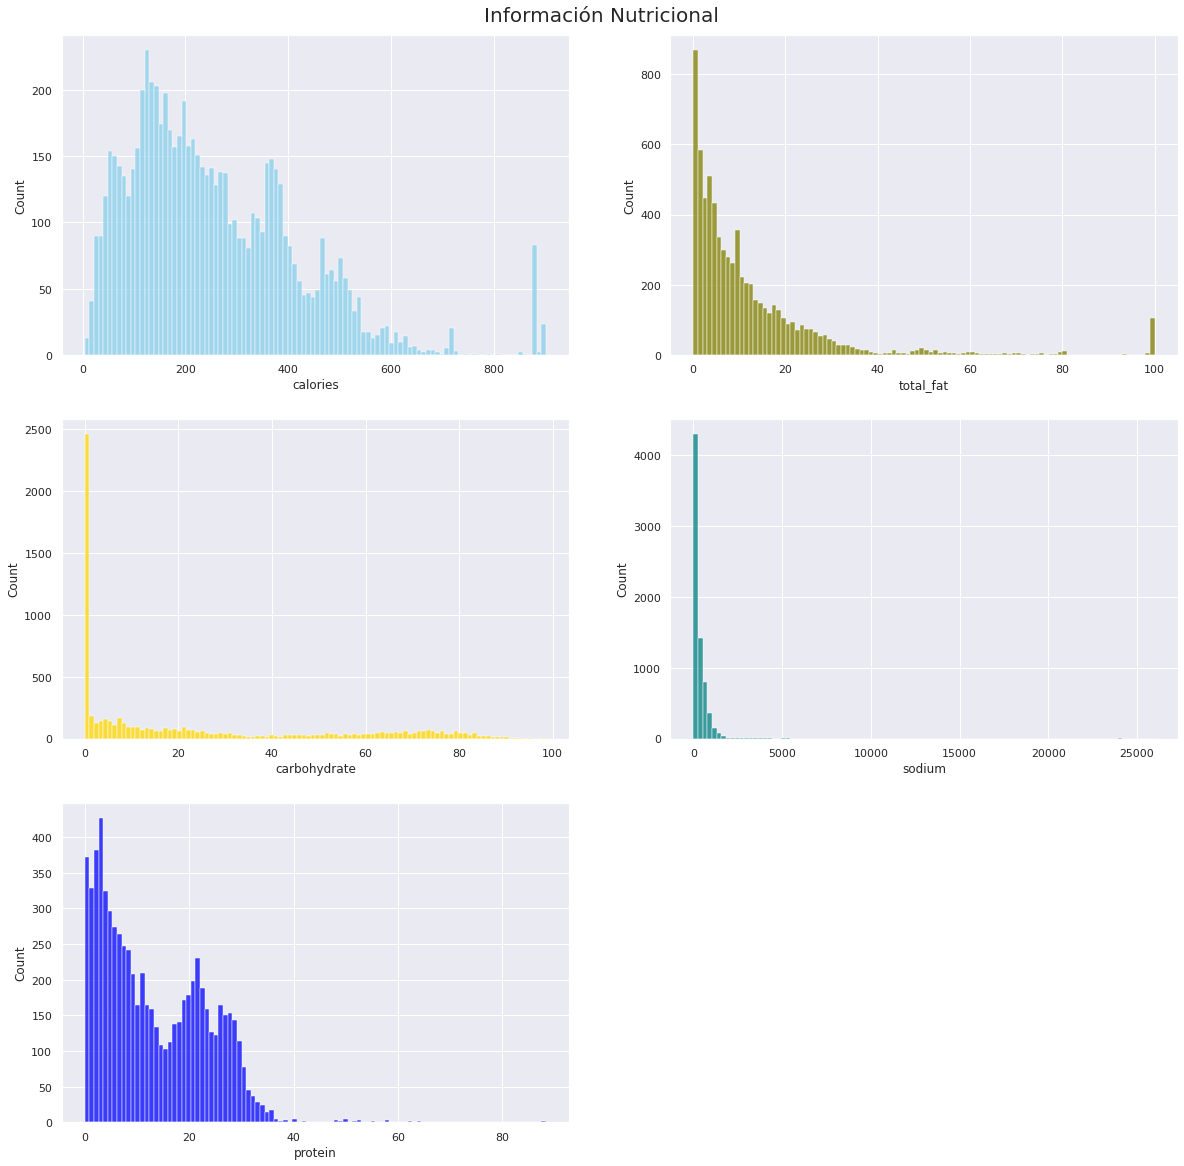

In [ ]:
# Histogramas por cada info nutricional
fig, axes = plt.subplots(3, 2, figsize=(20, 20), sharex=False)

fig.suptitle('Información Nutricional', y=0.9, fontsize=20)
sns.histplot(df_nutri["calories"], color="skyblue", stat='count', bins=100, ax=axes[0, 0])
sns.histplot(df_nutri["total_fat"], color="olive", stat='count', bins=100, ax=axes[0, 1])
sns.histplot(df_nutri["carbohydrate"], color="gold", stat='count', bins=100, ax=axes[1, 0])
sns.histplot(df_nutri["sodium"], color="teal", stat='count', bins=100,ax=axes[1, 1])
sns.histplot(df_nutri["protein"], color="blue", stat='count', bins=100,ax=axes[2, 0])
fig.delaxes(axes[2,1])

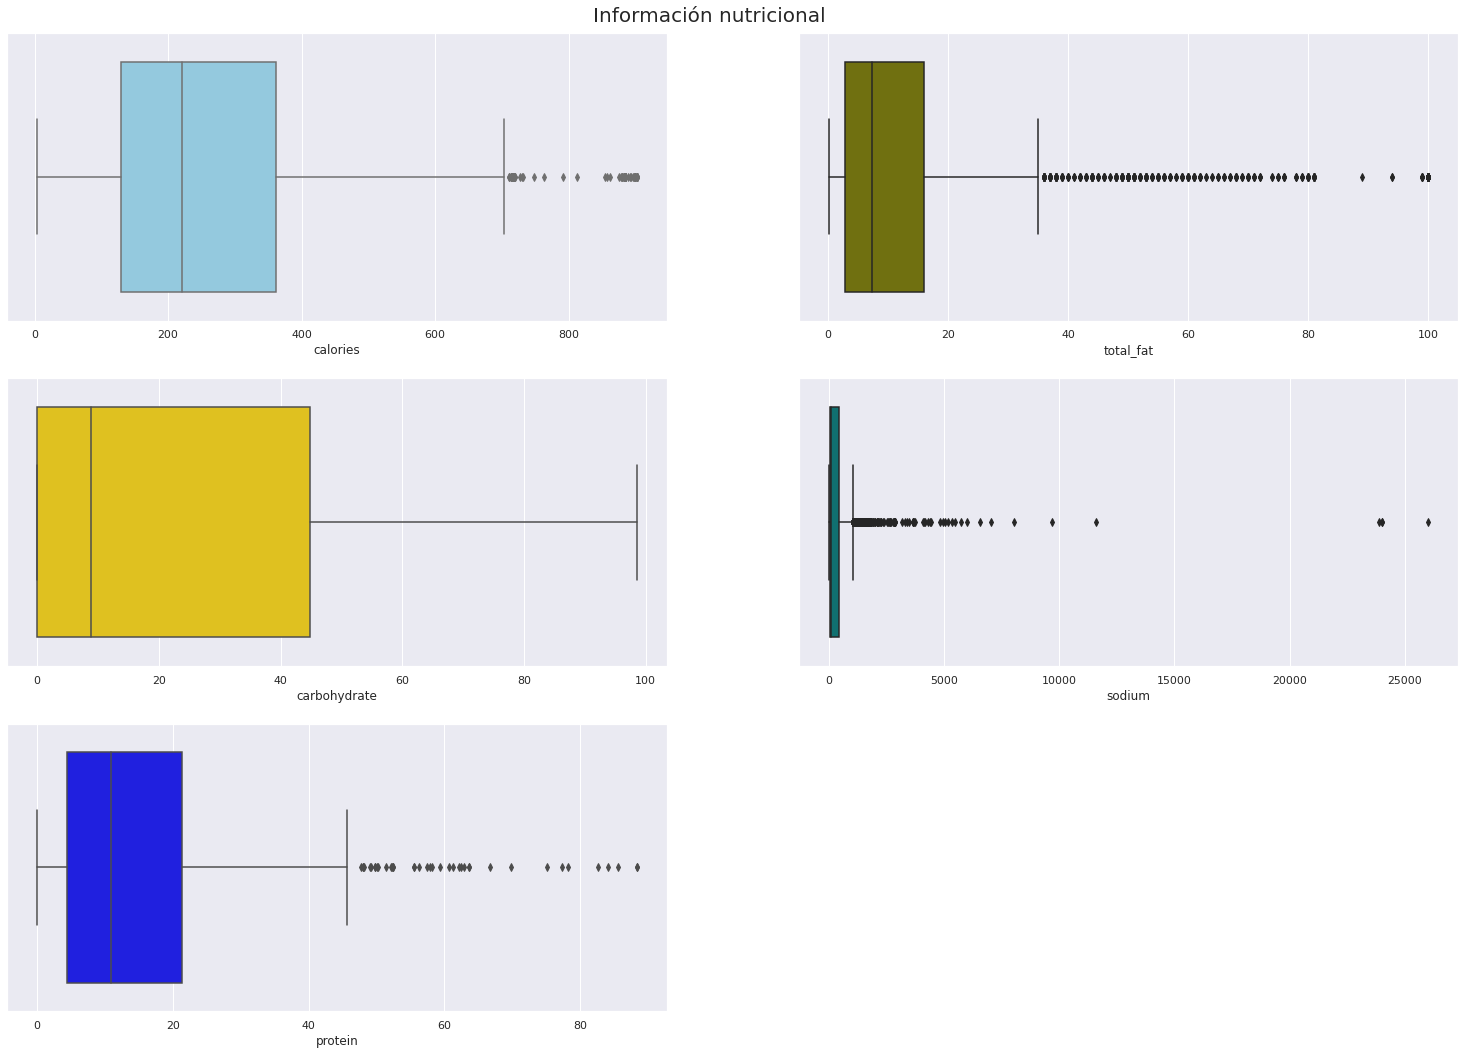

In [ ]:
# Caja y bigote de la cantidad nutricional
f, axes = plt.subplots(nrows=3, ncols=2, figsize=(26,18))

f.suptitle('Información nutricional', y=0.9, fontsize=20)
sns.boxplot(x=df_nutri['calories'], color="skyblue", ax=axes[0, 0])
sns.boxplot(x=df_nutri['total_fat'], color="olive", ax=axes[0, 1])
sns.boxplot(x=df_nutri['carbohydrate'], color="gold", ax=axes[1, 0])
sns.boxplot(x=df_nutri['sodium'], color="teal", ax=axes[1, 1])
sns.boxplot(x=df_nutri['protein'], color="blue", ax=axes[2, 0])

f.delaxes(axes[2,1])

In [ ]:
# Heatmap de contenido mineral de 10 alimentos al azar
df_min = df[["copper", "irom", "magnesium", "manganese", "phosphorous", "potassium"]]

df_min['copper'] = df_min['copper'].str.rstrip('mg').astype('float')
df_min['irom'] = df_min['irom'].str.rstrip('mg').astype('float')
df_min['magnesium'] = df_min['magnesium'].str.rstrip('mg').astype('float')
df_min['manganese'] = df_min['manganese'].str.rstrip('mg').astype('float')
df_min['phosphorous'] = df_min['phosphorous'].str.rstrip('mg').astype('float')
df_min['potassium'] = df_min['potassium'].str.rstrip('mg').astype('float')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

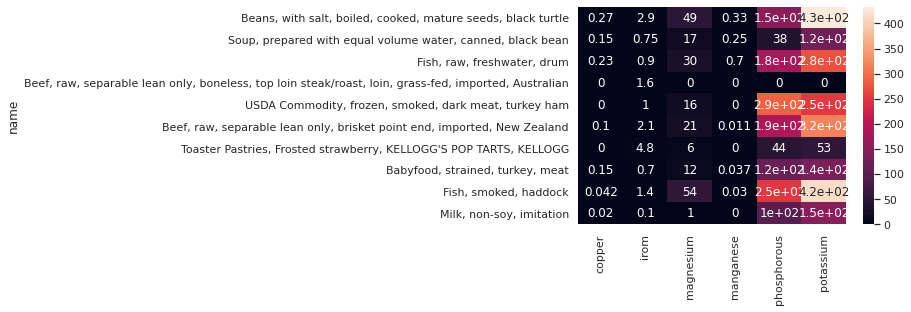

In [ ]:

df_min = df_min.loc[list(np.random.choice(df.index, size=10))]
g = sns.heatmap(df_min, annot=True)

1. ¿Hay alguna variable que no aporte información?
En ciertos alimentos hay variables de químicos que el tipo de dato que presenta esta en cero por lo que no nos proporciona información alguna. Asímismo, hay columnas de información que no se requieren para los propósitos de este análisis como la variedad de químicos y elementos que no portan datos nutrimentales. 
2. Si tuvieras que eliminar variables, ¿cuáles quitarías y por qué? 
En relación a la pregunta anterior consideramos quitar químicos en donde su dato sea cero ya que no apoyan demasiado a la hora de llevar a cabo un análisis. Estas variables serían hydroxyproline y carotene_alpha. De igual manera, se utilizó el método de dropna() para eliminar los datos que contengan valores nulos. 
3. ¿Existen variables que tengan datos extraños? 
Se devolvió una serie con el tipo de datos en el que no se observaban datos extraños solo que si hay columnas con tipos de datos mixtos (object). Más que extraños podríamos definir algunos datos como outliers, ya que se muestran un tanto fuera del rango medio de la variedad de datos que se analizaron respecto a los factores nutricionales.
4. Si comparas las variables, ¿todas están en rangos similares? ¿Crees que esto afecte?
No, no todas las variables se encuentran en rangos similares de hecho el rango es muy grande en gran mayoría de los datos. Esto sí afecta ya que el análisis que se puede realizar en una base de datos de 7199 datos cuesta mucho más trabajo y esfuerzo debido a lo extenso que es asimismo las conclusiones a las que se pueden llegar pueden ser muy dispersas al igual que los datos.
5. ¿Puedes encontrar grupos que se parezcan? ¿Qué grupos son estos?
Sí, pudimos encontrar un grupo de datos que se pareciera siendo este el grupo de información nutrimental de los alimentos en donde incluimos calorías, grasas totales,carbohidratos, sodio y proteínas. De igual manera el grupo de datos de aditivos químicos. Gracias a esto se puede limitar el consumo de ciertos alimentos y consumir más los alimentos que favorecen.
